$ 내가 느끼기에는 이러한데 맞나? $
- 앙상블종류 
    - 투표방식
        - bagging => randomForest model 
        - voting  
            - hard voting
            - soft voting 
            
            
    - 부스팅방식 
        - 
        - 

@ 목차
# 10. Ensenble

## 10.1 투표방식
### 10.1.1 bagging
#### 10.1.1.1 Random Forest

### 10.1.2 voting 
#### 10.1.2.1 hard voting
#### 10.1.2.2 soft voting 

## 10.2 boosting


# 10. Ensenble 
- 하나의 모델만을 학습시켜 사용하지 않고 여러 모델을 학습시켜 결합하는 방식으로 문제를 해결하는 방식
- 개별로 학습한 여러 모델을 조합해 과적합을 막고 일반화 성능을 향상시킬 수 있다.
- 개별 모델의 성능이 확보되지 않을 때 성능향상에 도움될 수 있다.

@ 앙상블의 종류 
1. 투표방식
    - 여러개의 추정기(Estimator)가 낸 결과들을 투표를 통해 최종 결과를 내는 방식
    - 종류
        1. Bagging - 같은 유형의 알고리즘들을 조합하되 각각 학습하는 데이터를 다르게 한다. 
        2. Voting - 서로 다른 종류의 알고리즘들을 결합한다.
    
    
    
2. boosting 
    - 약한 학습기(Weak Learner)들을 결합해서 보다 정확하고 강력한 학습기(Strong Learner)를 만든다.
    - 각 약한 학습기들은 순서대로 일을 하며 뒤의 학습기들은 앞의 학습기가 찾지 못한 부분을 추가적으로 찾는다.



## 10.1 투표방식
### 10.1.1 Bagging 
### 10.1.1.1 Random Forest
- 랜덤포레스트는 Bagging방식의 앙상블 모델이다.
- 랜덤포레스트는 결정트리를 기반으로 한다. 
- 다수의 결정트리를 사용해서 성능을 올린 앙상블 알고리즘이다. 
- 학습데이터를 샘플링해서 다수의 결정트리를 생성하고 이를 기반으로 다수결로 결과를 결정하는 방식이다.
- 다수의 결정트리를 만드는데서 랜덤포레스트라고 부른다.


- 처리속도가 (??)보다 빠르며 분류성능도 높은 모델로 알려져 있다.

- 랜덤포레스트의 절차 
    - 결정트리의 개수를 하이퍼파라미터로 받는다.
    - 랜덤포레스트를 구성하는 모든 결정트리가 서로 다르도록 만든다. 
        - 각 트리는 부스트스트랩 샘플링(중복을 허용하면서 랜덤하게 샘플링하는 방식)으로 데이터 셋을 준비한다. 
        - 총 데이터의 수는 원래 데이터 셋과 동일하지만 중복 허용여부에 따라서 일부는 누락되고 일부는 중복된다.
        - 각 트리는 전체 피처 중 일부의 피처만 랜덤하게 가지게 된다. 
    - 예측 결과 
         - 분류의 경우 그 예측을 모아 다수결 투표로 클래스 결과를 낸다. 
         - 회귀의 경우 예측 결과의 평균을 낸다. 
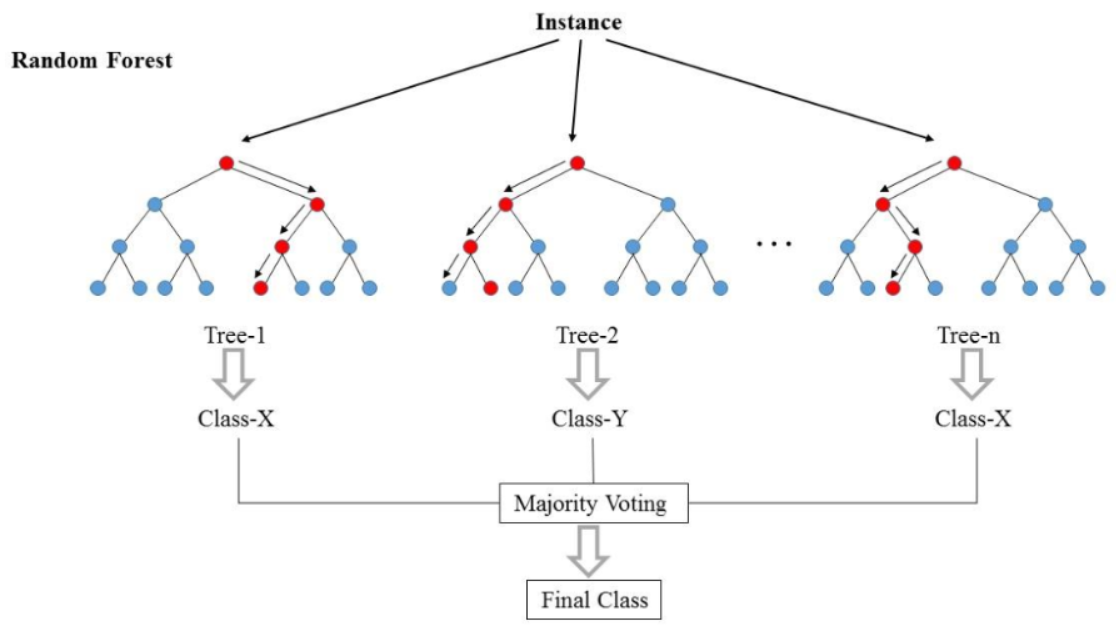


- 주요 하이퍼파라미터 
    - n_estimators
        - tree의 개수
        - 시간과 메모리가 허용하는 범위에서 클수록 좋다. 
    - max_features
        - 각 트리에서 선택할 feature의 개수
        - 클수록 각 트리간의 feature 차이가 없어지고 작을 수록 차이가 많이 나게 된다.
    - max_depth, min_samples_leaf, ..
        - DecisionTreeClassifier의 하이퍼파라미터들
        - 트리의 최대 깊이, 가지를 치기 위한 최소 샘플 수 등 결정 트리에서 과적합을 막기 위한 파라미터들을 랜덤 포레스트에 적용할 수 있다.

In [2]:
# 예제 - Wine Dataset 
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


wine = pd.read_csv('data/wine.csv')
# wine.shape
# wine.info()

y = wine['color']
X = wine.drop('color', axis = 1)

# preprocessing : LabelEncoding (feature : quality)
encoder = LabelEncoder()
X['quality'] = encoder.fit_transform(X['quality'])

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

# model 
rf = RandomForestClassifier(n_estimators=200, # DecisonTree 갯수
                            max_features=7, #  X_train.shape 확인 -> (4872, 12) -> 컬럼 12개 중 7개 단, 7개 다른 컬럼을 뽑아서(중복허용)
                            max_depth=5,
                            n_jobs = -1, # cpu 전체 사용하기 (-1)
                            random_state=1)
rf.fit(X_train, y_train)

# predict 
pred_train = rf.predict(X_train)
pred_test = rf.predict(X_test)

print('- rf accuracy score_ train :', accuracy_score(y_train, pred_train))
print('- rf accuracy score_ test  :', accuracy_score(y_test, pred_test))
X_train

- rf accuracy score_ train : 0.9938423645320197
- rf accuracy score_ test  : 0.9938461538461538


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
5619,6.4,0.37,0.12,5.90,0.056,6.0,91.0,0.99536,3.06,0.46,8.4,2
4154,6.3,0.13,0.42,1.10,0.043,63.0,146.0,0.99066,3.13,0.72,11.2,0
2309,6.1,0.25,0.24,12.10,0.046,51.0,172.0,0.99800,3.35,0.45,9.5,2
390,5.6,0.85,0.05,1.40,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,0
4625,8.4,0.22,0.30,8.90,0.024,17.0,118.0,0.99456,2.99,0.34,10.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5410,7.2,0.28,0.38,2.00,0.052,23.0,156.0,0.99120,3.13,0.52,11.1,2
3755,7.9,0.28,0.32,3.60,0.038,9.0,76.0,0.99200,3.05,0.31,11.7,2
1580,7.4,0.35,0.33,2.40,0.068,9.0,26.0,0.99470,3.36,0.60,11.9,1
4089,7.7,0.39,0.49,7.70,0.036,11.0,110.0,0.99660,3.33,0.76,10.0,1


feature 중요도 <-- 이건 무슨 내용이였지?? 
- 각 컬럼마다 중요도가 있었나? 
- 어떤 중요도였지?
- 이거 중요도 계산 기준은 뭐야? 

- 그리고 이거는 트리그래프로 보여주는게 어렵다고했나?? 그래프비즈로 그리려면 200개를 그려야 하는데 확인이 어려워서 잘 그리지 않는다. 
- 트리모델을 사용하기 때문에 피쳐의 중요도를 뽑을 수 있다. 트리계열은 피쳐의 중요도 추출 가능 

[1.65418896e-02 8.40754057e-02 4.25475173e-03 1.28155074e-02
 3.45672515e-01 1.17123357e-02 4.50963234e-01 3.32660368e-02
 1.08354032e-02 2.67077297e-02 2.89863770e-03 2.56553405e-04]


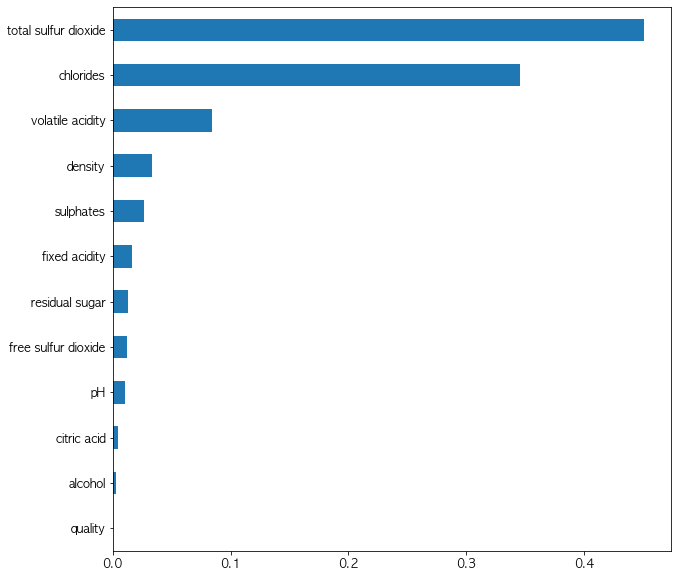

In [4]:
import matplotlib.pyplot as plt

fi = rf.feature_importances_

# 각 컬럼별 중요도를 데이터프레임 시리즈로 보기 위해
fi_s = pd.Series(fi, index = X_train.columns) 
fi_s.sort_values(ascending = False)

# 그래프로 확인 
fi_s.sort_values().plot(kind = 'barh', figsize = (10,10))
plt.show()

In [ ]:
# 예제 : 위스콘신 유방암 데이터 셋 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


### 10.1.2 voting 
- 서로 다른 종류의 알고리즘들을 결합한다. 
- from sklearn.ensemble import VotingClassifier 클래스 이용
    - estimators : 앙상블할 모델들 설정.  ("추정기이름", 추정기) 의 튜플을 리스트로 묶어서 전달
    - voting: voting 방식. hard(기본값), soft  지정

#### 10.1.2.1 hard voting
- 다수의 추정기가 결정한 예측값들 중 많은 것을 선택하는 방식 
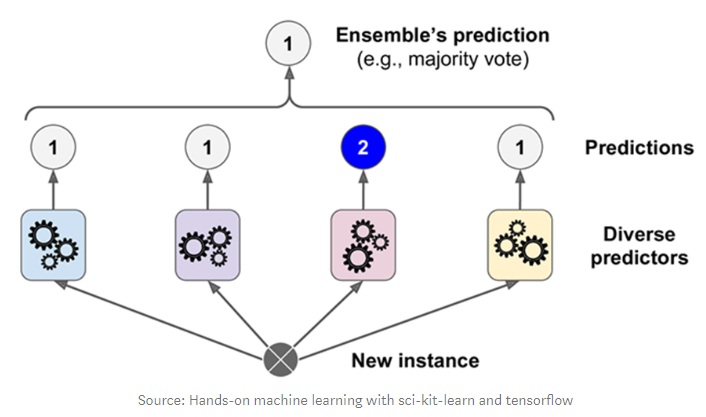

In [7]:
# 함수선언 : 정확도, 재현율, 정밀도, f1점수 처리 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def print_metrics(y, y_pred, title=None):
    if title: # title != None 
        print(title)
    metrics = f'정확도 : {accuracy_score(y, y_pred)}, 재현율 : {recall_score(y, y_pred)}, 정밀도 : {precision_score(y,y_pred)}, f1점수 : {f1_score(y,y_pred)}'
    print(metrics)

In [14]:
# 예제 : wine data 
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


# data
wine = pd.read_csv('data/wine.csv')
y = wine['color']
X = wine.drop('color', axis = 1)

# Encoding - oneHot , why? quality가 문자열 처리가 되어있기 때문에 
ohe = OneHotEncoder()
quality = ohe.fit_transform(np.array(X['quality']).reshape(-1,1)).toarray() # 2차원 배열로 넣어주기 위해서 
X = pd.concat([X, pd.DataFrame(quality, columns = ohe.get_feature_names())], axis = 1)
X.drop('quality', axis = 1, inplace = True)
X.head(2)

# split 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

# model 
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=200)
svc = SVC(C = 1.0, gamma = 0.1, probability = True) # softVoting 하려면 probability = True 

# pipe 처리 전 
# estimators = [('knn',knn),('random forest',rf), ('svm',svc)]

# pipe 처리 후 : rf 제외하고 파이프라인 별도로 처리하고 싶을 때 각각 파이프라인을 해줘야한다. 
knn_pipe = make_pipeline(StandardScaler(), knn)
svc_pipe = make_pipeline(StandardScaler(), svc)
estimators = [('knn',knn_pipe),('random forest',rf), ('svm',svc_pipe)]

# Hard voting 
voting = VotingClassifier(estimators)
voting.fit(X_train, y_train) # estimators에 등록한 모든 모델을 학습시킨다. 

# predict 
pred_train = voting.predict(X_train)
pred_test = voting.predict(X_test)

print_metrics(y_train, pred_train, 'Train set Hard Voting')
print_metrics(y_test, pred_test, 'Test set Hard Voting')

Train set Hard Voting
정확도 : 0.9967159277504105, 재현율 : 0.9883236030025021, 정밀도 : 0.9983150800336984, f1점수 : 0.9932942162615256
Test set Hard Voting
정확도 : 0.9975384615384615, 재현율 : 0.995, 정밀도 : 0.995, f1점수 : 0.995


#### 10.1.2.2 soft voting 
- 다수의 추정기가 각 레이블별 예측한 확률들의 평균을 내서 높은 레이블값을 결과값으로 선택하는 방식 
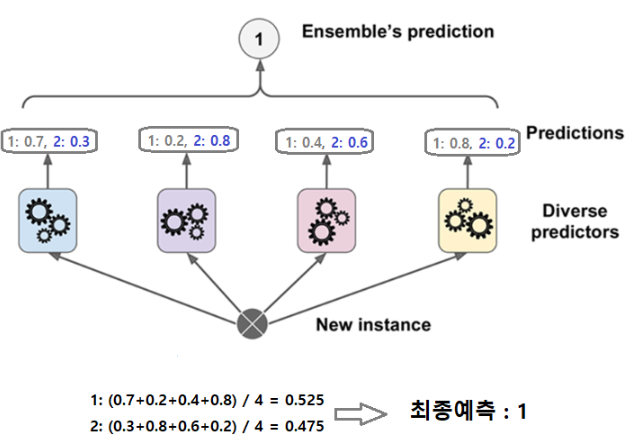

In [13]:
# soft voting 
voting_soft = VotingClassifier(estimators, voting = 'soft') # voting 의 default가 hard, soft일때는 지정 
voting_soft.fit(X_train, y_train)

pred_train_soft = voting_soft.predict(X_train)
pred_test_soft = voting_soft.predict(X_test)

print_metrics(y_train, pred_train_soft, "Train_soft Voting")
print_metrics(y_test, pred_test_soft, "Test_soft Voting")

Train_soft Voting
정확도 : 0.9969211822660099, 재현율 : 0.9891576313594662, 정밀도 : 0.9983164983164983, f1점수 : 0.993715961457897
Test_soft Voting
정확도 : 0.9963076923076923, 재현율 : 0.99, 정밀도 : 0.9949748743718593, f1점수 : 0.9924812030075189


## 10.2 Boosting 
